In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing all datasets
country_data = pd.read_csv("Country-data.csv")

In [4]:
#Innspecting country_data
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
#Dummy variable creation is not required here as no categorical variable is present with 2 or more levels.
#Inspecting all column types
country_data.info()

#We can see that all float objects except country name.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [7]:
#Interpreting missing values column and row wise
round(100*(country_data.isnull().sum()/len(country_data.index)), 2)

#No missing values are present in the dataset we can proceed further with the exact information given
#No duplicate rows found

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [8]:
#Standardizing dataset

#Dropping country column for standardizing the data frame
country_data1 = country_data.drop("country",axis =1)


In [9]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
country_std_data = standard_scaler.fit_transform(country_data1)

In [10]:
country_std_data = pd.DataFrame(country_std_data)

In [11]:
#Inspecting standardized data
country_std_data.head()

,0,1,2,3,4,5,6,7,8
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [12]:
#Doing PCA on standardized data
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=100)

In [13]:
#Doing the PCA on the country_std_data
pca.fit(country_std_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='randomized', tol=0.0, whiten=False)

In [14]:
#Plotting principal components
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [15]:
colnames = list(country_data1.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,-0.419519,0.192884,child_mort
1,0.283897,0.613163,exports
2,0.150838,-0.243087,health
3,0.161482,0.671821,imports
4,0.398441,0.022536,income
5,-0.193173,-0.008404,inflation
6,0.425839,-0.222707,life_expec
7,-0.403729,0.155233,total_fer
8,0.392645,-0.046022,gdpp


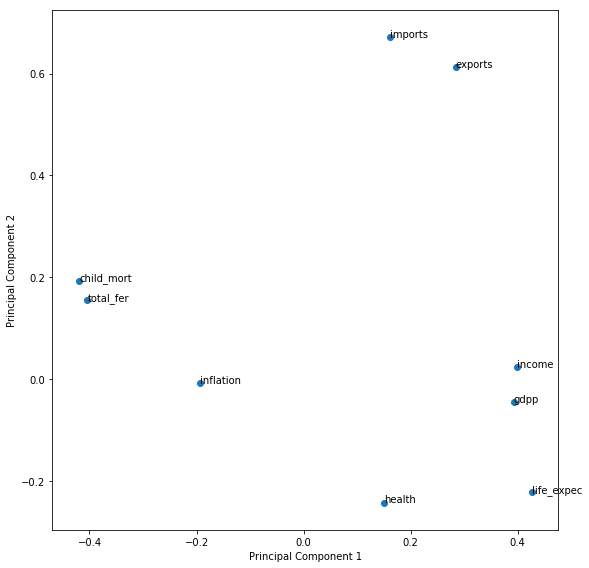

In [16]:
#plotting PC1 and PC2 against each other to see the correlation with original variables
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [17]:
#Inspecting % percentage variance of data with principal components
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

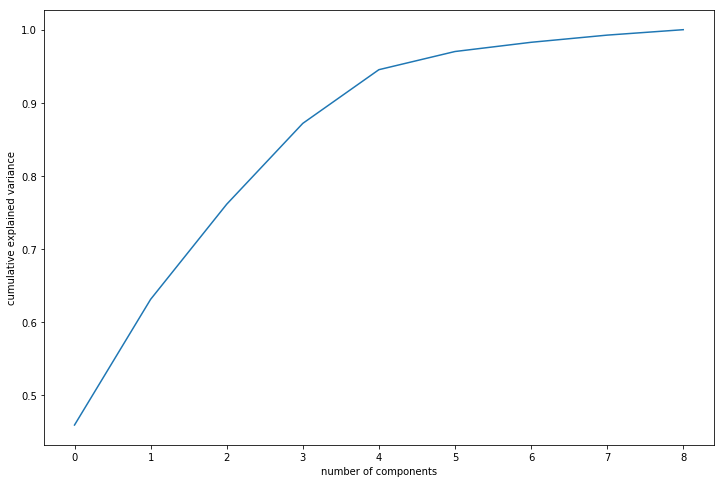

In [18]:
#Plotting scree plot to determine actual no of principal components required
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#From below plot we can clearly predict the relation between variance of data and no of principal components chosen.
#For e.g PC1 and PC2 gives aorund 60% variance
#For e.g. PC1 to PC5 gives around 95% of variance
#After PC4 the variance graph becomes pretty stable and flat.
#Hence we can go with 5 principal components

In [19]:
#Using incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [20]:
#Performing basis transformation on principal components determined above
df_pca = pca_final.fit_transform(country_std_data)
df_pca.shape

(167, 5)

In [21]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

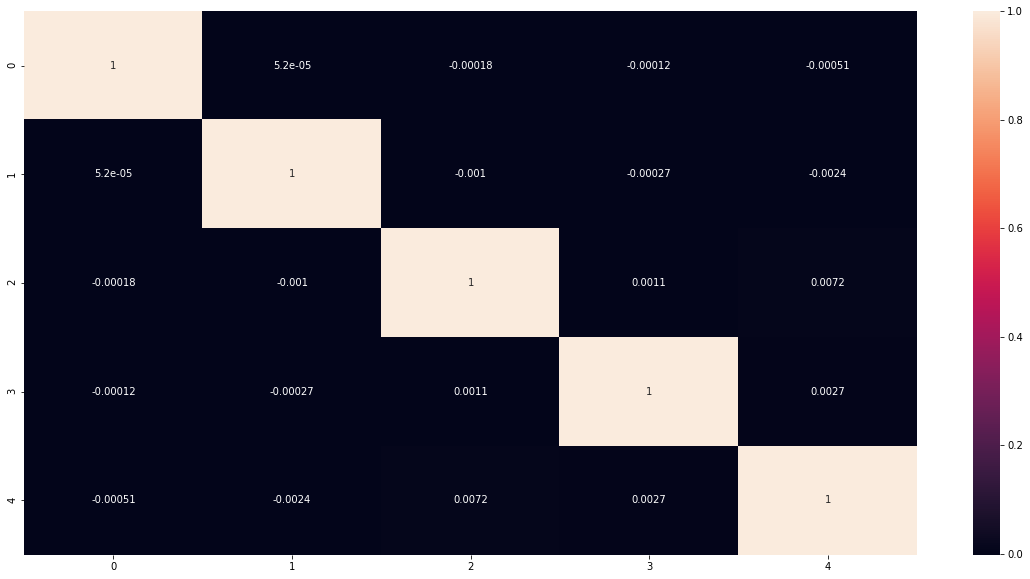

In [22]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)
#From below correlatin matrix we can identify that their is absolutely negiligible correlation between all PC1 to PC5 principal components


In [23]:
#identify minimum and maximum correlation
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("maximum corr:",corrmat_nodiag.max(), ", minimum corr: ", corrmat_nodiag.min(),)
# we see that correlations are equivalent to 0

maximum corr: 0.007194543060491425 , minimum corr:  -0.002374704497495838


In [24]:
#Concatening country column back to pca data set
country_data_pca = pd.concat([pd.DataFrame(df_pca),country_data['country']],axis=1)

In [25]:
#Renaming principal components
country_data_pca = pd.DataFrame({'PC1':country_data_pca[0],'PC2':country_data_pca[1], 'PC3':country_data_pca[2],'PC4':country_data_pca[3],'PC5':country_data_pca[4],'country':country_data_pca['country']})

In [26]:
country_data_pca.head()

,PC1,PC2,PC3,PC4,PC5,country
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,Afghanistan
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,Albania
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,Algeria
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,Angola
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,Antigua and Barbuda


In [27]:
#Custom function to remove outliers
def IQR(df,x):
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(country_data_pca[x] >= Q1 - 1.5*IQR) & (df[x] <= Q3 + 1.5*IQR)]
    return df

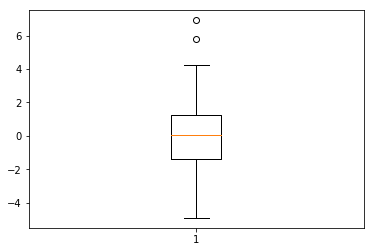

In [28]:
#Performing outlier treatment on each principal components chosen
#PC1
plt.boxplot(country_data_pca.PC1)
country_data_pca = IQR(country_data_pca,'PC1')

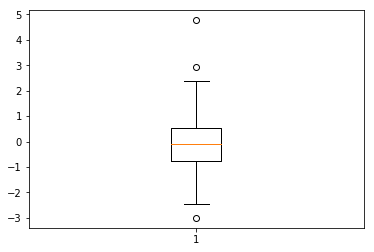

In [29]:
#PC2
plt.boxplot(country_data_pca.PC2)
country_data_pca = IQR(country_data_pca,'PC2')

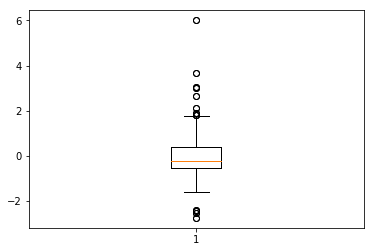

In [30]:
#PC3
plt.boxplot(country_data_pca.PC3)
plt.boxplot(country_data_pca.PC3)
country_data_pca = IQR(country_data_pca,'PC3')

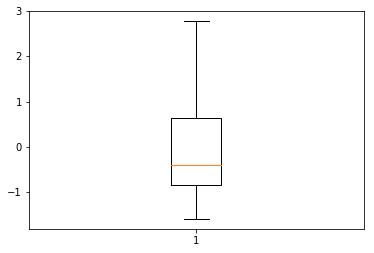

In [31]:
#PC4
plt.boxplot(country_data_pca.PC4)
country_data_pca = IQR(country_data_pca,'PC4')

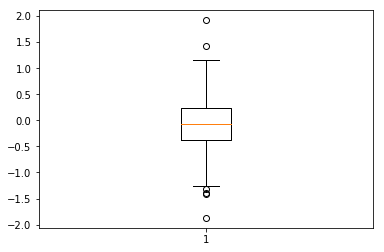

In [32]:
#PC5
plt.boxplot(country_data_pca.PC5)
country_data_pca = IQR(country_data_pca,'PC5')

In [33]:
#We have completely ignored outliers assuming only highly developed countries were present as outliers hence to avoid
#impact on coupling of each cluster.
#Inspecting all principal components after outlier treatment
country_data_pca.head()

,PC1,PC2,PC3,PC4,PC5,country
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,Afghanistan
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,Albania
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,Algeria
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,Angola
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,Antigua and Barbuda


In [34]:
#Combining pca data frame with original country data frame
country_data_pca_combined = country_data_pca.merge(country_data,how='left',left_on='country',right_on='country')

In [35]:
country_data_pca_combined.head()

,PC1,PC2,PC3,PC4,PC5,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


{'whiskers': [<matplotlib.lines.Line2D at 0x1f9be20bf60>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9be20b8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9be2141d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9be235438>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9be1a95f8>],
 'means': []}

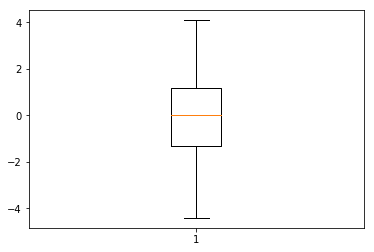

In [36]:
#Plotting all principal components in box plots to see the difference after outlier treatment
#PC1
plt.boxplot(country_data_pca.PC1)
#We can clearly see now PC1 is uniformly distributed without any outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1f9be104710>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9be10d240>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9be104da0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9be10da90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9be10d470>],
 'means': []}

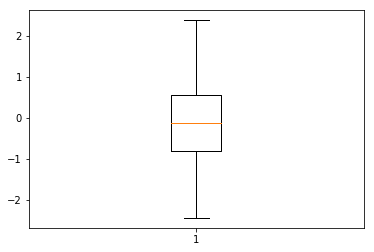

In [37]:
#PC2
plt.boxplot(country_data_pca.PC2)
#We can clearly see now PC2 is uniformly distributed without any outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1f9bdd40128>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9bdd67940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9bdd402e8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9bdf154e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9bcae2240>],
 'means': []}

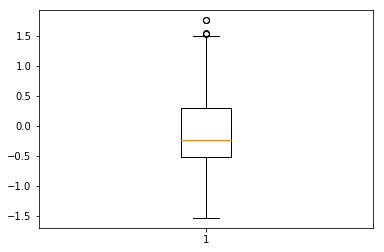

In [38]:
#PC3
plt.boxplot(country_data_pca.PC3)
#We can clearly see now PC3 is uniformly distributed without any outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1f9be1e5748>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9be1ea048>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9be1e55f8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9be1ea828>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9be1eac50>],
 'means': []}

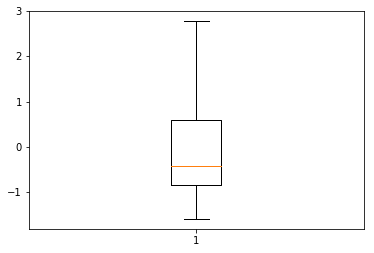

In [39]:
#PC4
plt.boxplot(country_data_pca.PC4)
#We can clearly see now PC4 is uniformly distributed without any outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1f9be1aa048>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9be1aa908>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9be1b2eb8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9be192198>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9be1925c0>],
 'means': []}

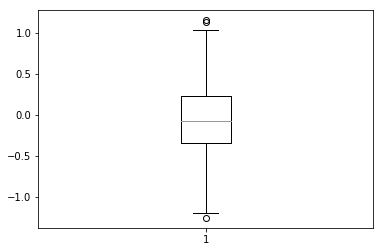

In [40]:
#PC5
plt.boxplot(country_data_pca.PC5)
#We can clearly see now PC5 is uniformly distributed without any outliers

In [41]:
#Implementing K-Means algorithm to cluster countries according to principal components chosen
country_data_pca_kmeans = country_data_pca.drop('country',axis=1)

In [42]:
#performing hopkins statistics to check how well cluster can be formed.A value closer to 1 says data is heavily clustered.
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [45]:
#Executing hopkins on principal components
hopkins(country_data_pca_kmeans)
#As we can see value lies closer to 1 so it shows data is well clustered.

0.766638737211238

In [46]:
# To perform KMeans clustering 
from sklearn.cluster import KMeans

In [47]:
#Performing Silhouette Analysis to determine optimum no of clusters required to group countries.
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(country_data_pca_kmeans)
    sse_.append([k, silhouette_score(country_data_pca_kmeans, kmeans.labels_)])

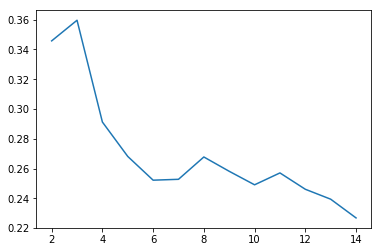

In [48]:
#Plotting Sum of squared values 
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

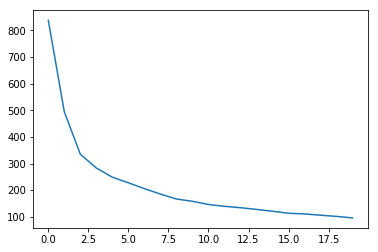

In [49]:
#Plotting elbow curve for all SSD's
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(country_data_pca_kmeans)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [73]:
#Performing Kmeans with K=5 as from above elbow curve we can infer that after k=5 graph tends towards flattened nature.
counntry_Kmeans_model_5 = KMeans(n_clusters = 5, max_iter=50)
counntry_Kmeans_model_5.fit(country_data_pca_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [74]:
#Calculating mean principal components values grouped by each of the 5 cluster.
country_data_pca.index = pd.RangeIndex(len(country_data_pca.index))
country_data_pca_km = pd.concat([country_data_pca, pd.Series(counntry_Kmeans_model_5.labels_)], axis=1)
country_data_pca_km.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','country','ClusterID']

km_clusters_PC1 = 	pd.DataFrame(country_data_pca_km.groupby(["ClusterID"]).PC1.mean())
km_clusters_PC2 = 	pd.DataFrame(country_data_pca_km.groupby(["ClusterID"]).PC2.mean())
km_clusters_PC3 = 	pd.DataFrame(country_data_pca_km.groupby(["ClusterID"]).PC3.mean())
km_clusters_PC4 = 	pd.DataFrame(country_data_pca_km.groupby(["ClusterID"]).PC4.mean())
km_clusters_PC5 = 	pd.DataFrame(country_data_pca_km.groupby(["ClusterID"]).PC5.mean())

In [75]:
#Forming a combined data frame of all 5 clusters along with 5 mean principal components.
df_pca_mean = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_PC1, km_clusters_PC2, km_clusters_PC3,km_clusters_PC4,km_clusters_PC5], axis=1)
df_pca_mean.columns = ["ClusterID", "PC1_mean", "PC2_mean", "PC3_mean","PC4_mean","PC5_mean"]
df_pca_mean.head()

,ClusterID,PC1_mean,PC2_mean,PC3_mean,PC4_mean,PC5_mean
0,0,2.589482,-1.084266,-0.308810,1.061327,-0.105331
1,1,0.872092,0.276869,-0.318691,-0.764756,0.196240
2,2,-2.976693,0.413839,-0.583979,1.104738,-0.344615
3,3,-1.652685,0.481106,0.295528,0.052881,-0.197420
4,4,-0.252332,-0.778332,0.336585,-0.798800,-0.042234


In [54]:
#Performing cluster analysis with K=3
#Performing Kmeans with K=3
counntry_Kmeans_model_3 = KMeans(n_clusters = 3, max_iter=50)
counntry_Kmeans_model_3.fit(country_data_pca_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [55]:
#Calculating mean of all 5 principal componets for each of 3 clusters formed
country_data_pca.index = pd.RangeIndex(len(country_data_pca.index))
country_data_pca_km = pd.concat([country_data_pca, pd.Series(counntry_Kmeans_model_3.labels_)], axis=1)
country_data_pca_km.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','country','ClusterID']

km_clusters_PC1 = 	pd.DataFrame(country_data_pca_km.groupby(["ClusterID"]).PC1.mean())
km_clusters_PC2 = 	pd.DataFrame(country_data_pca_km.groupby(["ClusterID"]).PC2.mean())
km_clusters_PC3 = 	pd.DataFrame(country_data_pca_km.groupby(["ClusterID"]).PC3.mean())
km_clusters_PC4 = 	pd.DataFrame(country_data_pca_km.groupby(["ClusterID"]).PC4.mean())
km_clusters_PC5 = 	pd.DataFrame(country_data_pca_km.groupby(["ClusterID"]).PC5.mean())

In [56]:
##Forming a combined data frame of 3 clusters and 5 principal components mean
df_pca_mean = pd.concat([pd.Series([0,1,2]), km_clusters_PC1, km_clusters_PC2, km_clusters_PC3,km_clusters_PC4,km_clusters_PC5], axis=1)
df_pca_mean.columns = ["ClusterID", "PC1_mean", "PC2_mean", "PC3_mean","PC4_mean","PC5_mean"]
df_pca_mean.head()

,ClusterID,PC1_mean,PC2_mean,PC3_mean,PC4_mean,PC5_mean
0,0,0.217708,-0.137744,-0.030041,-0.802219,0.099812
1,1,2.468969,-0.901149,-0.304228,0.819821,-0.114772
2,2,-2.381689,0.415688,-0.073024,0.626552,-0.281823


In [83]:
#Combined data frame of principal components with cluster ID's for each country.(n=3)
country_data_pca_km.head()

,PC1,PC2,PC3,PC4,PC5,country,ClusterID
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,Afghanistan,2
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,Albania,1
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,Algeria,4
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,Angola,3
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,Antigua and Barbuda,1


In [58]:
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [59]:
country_data_pca_hierarchial = country_data_pca.drop('country',axis=1)

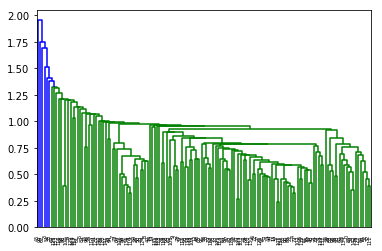

In [85]:
#Applying hierarichial clustering to determine optimum no of clusters
#Using single linkage technique
mergings = linkage(country_data_pca_hierarchial, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

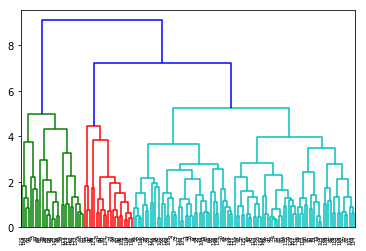

In [86]:
#Using complete linkage technique
mergings = linkage(country_data_pca_hierarchial, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [87]:
#Cutting the dendogram obtained above with a horizontal line for 5 clusters.
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
country_data_pca_hc = pd.concat([country_data_pca, clusterCut], axis=1)
country_data_pca_hc.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','country','ClusterID']

In [88]:
#Calculating mean for all 5 principal components grouped by each cluster.
hc_clusters_PC1 = 	pd.DataFrame(country_data_pca_hc.groupby(["ClusterID"]).PC1.mean())
hc_clusters_PC2 = 	pd.DataFrame(country_data_pca_hc.groupby(["ClusterID"]).PC2.mean())
hc_clusters_PC3 = 	pd.DataFrame(country_data_pca_hc.groupby(["ClusterID"]).PC3.mean())
hc_clusters_PC4 = 	pd.DataFrame(country_data_pca_hc.groupby(["ClusterID"]).PC4.mean())
hc_clusters_PC5 = 	pd.DataFrame(country_data_pca_hc.groupby(["ClusterID"]).PC5.mean())

In [89]:
#Principal Components mean analysis corresponding to 5 clusters obtained from hierarchial clustering.
df_pca_mean_hc = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_PC1, km_clusters_PC2, km_clusters_PC3,km_clusters_PC4,km_clusters_PC5], axis=1)
df_pca_mean_hc.columns = ["ClusterID", "PC1_mean", "PC2_mean", "PC3_mean","PC4_mean","PC5_mean"]
df_pca_mean_hc.head()

,ClusterID,PC1_mean,PC2_mean,PC3_mean,PC4_mean,PC5_mean
0,0,2.589482,-1.084266,-0.308810,1.061327,-0.105331
1,1,0.872092,0.276869,-0.318691,-0.764756,0.196240
2,2,-2.976693,0.413839,-0.583979,1.104738,-0.344615
3,3,-1.652685,0.481106,0.295528,0.052881,-0.197420
4,4,-0.252332,-0.778332,0.336585,-0.798800,-0.042234


In [65]:
#If we compare mean data frames of both hierarchial and k-means clustering (k=5) we get approximately same values.
#So lets go with 5 clusters and combine the clustered data with main data frame obtained after performing EDA.

In [90]:
#Combining clustered data frame with original data fram on Country basis
country_data_pca_combined = country_data_pca_km.merge(country_data,how='left',left_on='country',right_on = 'country')

In [91]:
country_data_pca_combined.head()

,PC1,PC2,PC3,PC4,PC5,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,Afghanistan,2,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,Albania,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,Algeria,4,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,Angola,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,Antigua and Barbuda,1,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [92]:
#Calculating mean for all original variables in country data frame
clusters_child_mort = 	pd.DataFrame(country_data_pca_combined.groupby(["ClusterID"]).child_mort.mean())
clusters_exports = 	pd.DataFrame(country_data_pca_combined.groupby(["ClusterID"]).exports.mean())
clusters_health = 	pd.DataFrame(country_data_pca_combined.groupby(["ClusterID"]).health.mean())
clusters_imports = 	pd.DataFrame(country_data_pca_combined.groupby(["ClusterID"]).imports.mean())
clusters_income = 	pd.DataFrame(country_data_pca_combined.groupby(["ClusterID"]).income.mean())
clusters_inflation = 	pd.DataFrame(country_data_pca_combined.groupby(["ClusterID"]).inflation.mean())
clusters_life_expec = 	pd.DataFrame(country_data_pca_combined.groupby(["ClusterID"]).life_expec.mean())
clusters_total_fer = 	pd.DataFrame(country_data_pca_combined.groupby(["ClusterID"]).total_fer.mean())
clusters_gdpp = 	pd.DataFrame(country_data_pca_combined.groupby(["ClusterID"]).gdpp.mean())

In [93]:
#Forming a combined data frame with cluster ID's and all original variables mean.
df_org_col_mean = pd.concat([pd.Series([0,1,2,3,4]), clusters_child_mort, clusters_exports, clusters_health,clusters_imports,clusters_income,clusters_inflation,clusters_life_expec,clusters_total_fer,clusters_gdpp], axis=1)
df_org_col_mean.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df_org_col_mean.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,4.159091,42.018182,10.177727,39.268182,39850.000000,1.340136,80.990909,1.805455,45281.818182
1,1,14.509091,52.588636,6.903636,58.879545,15790.454545,4.114955,74.522727,1.955000,9458.318182
2,2,111.010526,24.643158,7.268421,40.468421,1496.578947,8.797368,55.794737,5.607368,621.473684
3,3,67.475000,38.828750,5.118333,43.662500,6519.166667,11.482083,63.237500,4.292083,3189.625000
4,4,25.150000,26.708235,5.591471,32.417647,10689.117647,9.065471,72.811765,2.434412,5342.058824


In [94]:
#Inspecting mean data frame for original columns corresponding to 5 clusters formed.
df_org_col_mean

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,4.159091,42.018182,10.177727,39.268182,39850.000000,1.340136,80.990909,1.805455,45281.818182
1,1,14.509091,52.588636,6.903636,58.879545,15790.454545,4.114955,74.522727,1.955000,9458.318182
2,2,111.010526,24.643158,7.268421,40.468421,1496.578947,8.797368,55.794737,5.607368,621.473684
3,3,67.475000,38.828750,5.118333,43.662500,6519.166667,11.482083,63.237500,4.292083,3189.625000
4,4,25.150000,26.708235,5.591471,32.417647,10689.117647,9.065471,72.811765,2.434412,5342.058824


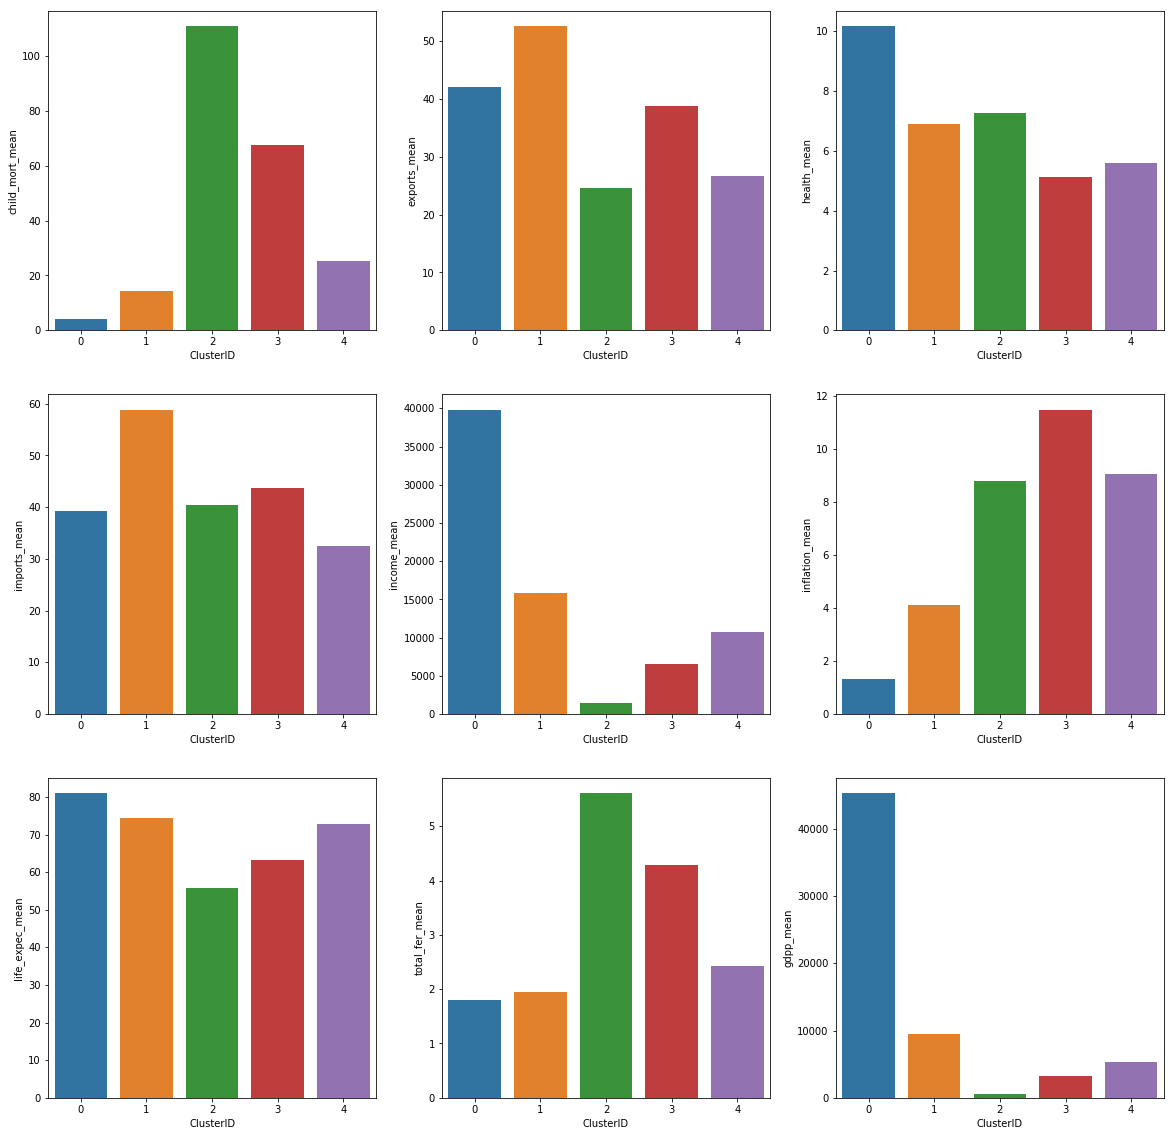

In [95]:
#Mean analysis of all original columns.
#Plotting all original variables grouped by clusters
plt.figure(figsize=(20,20))

plt.subplot(3, 3, 1)
sns.barplot(x=df_org_col_mean.ClusterID, y=df_org_col_mean.child_mort_mean)

plt.subplot(3, 3, 2)
sns.barplot(x=df_org_col_mean.ClusterID, y=df_org_col_mean.exports_mean)

plt.subplot(3, 3, 3)
sns.barplot(x=df_org_col_mean.ClusterID, y=df_org_col_mean.health_mean)

plt.subplot(3, 3, 4)
sns.barplot(x=df_org_col_mean.ClusterID, y=df_org_col_mean.imports_mean)

plt.subplot(3, 3, 5)
sns.barplot(x=df_org_col_mean.ClusterID, y=df_org_col_mean.income_mean)

plt.subplot(3, 3, 6)
sns.barplot(x=df_org_col_mean.ClusterID, y=df_org_col_mean.inflation_mean)

plt.subplot(3, 3, 7)
sns.barplot(x=df_org_col_mean.ClusterID, y=df_org_col_mean.life_expec_mean)

plt.subplot(3, 3, 8)
sns.barplot(x=df_org_col_mean.ClusterID, y=df_org_col_mean.total_fer_mean)

plt.subplot(3, 3, 9)
sns.barplot(x=df_org_col_mean.ClusterID, y=df_org_col_mean.gdpp_mean)
plt.show()

#From below plotted graphs we can identify child_mortality_Rate holds visible variance among 5 clusters hence its an
#immportant parameter to consider.
#Mean income also has high variance among all 5 clusters , highest in cluster1 and lowest in cluster 2.
#Inflation should be considered as it is lowest in cluster 0 but considerabliy high in cluster 2 and cluster 3.
#Total_feritlity_rate is highest in cluster 2 and lowest in cluster 0.
#GDPP in lowest in cluster 2 and highest in cluster 0 , hence we need to put in some investments in cluster 2.

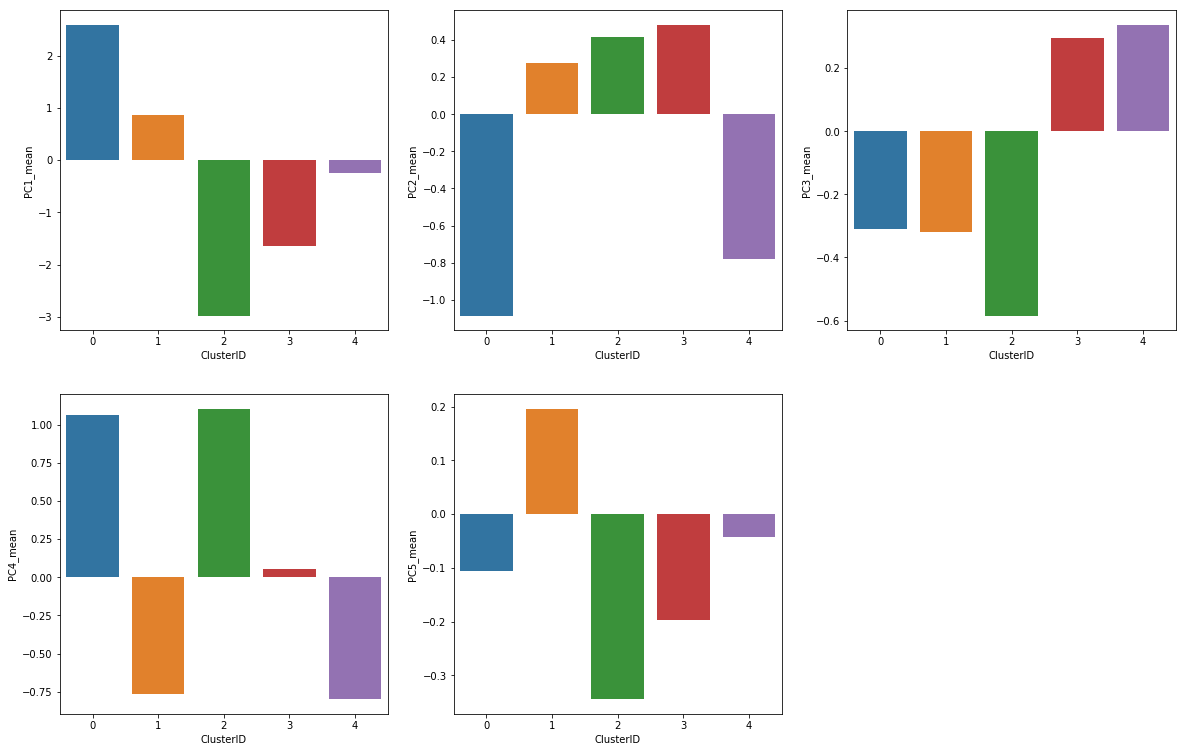

In [96]:
#Plotting all principal components grouped by clusters
#Mean anaalysis of all 5 principal components.
plt.figure(figsize=(20,20))

plt.subplot(3, 3, 1)
sns.barplot(x=df_pca_mean.ClusterID, y=df_pca_mean.PC1_mean)

plt.subplot(3, 3, 2)
sns.barplot(x=df_pca_mean.ClusterID, y=df_pca_mean.PC2_mean)

plt.subplot(3, 3, 3)
sns.barplot(x=df_pca_mean.ClusterID, y=df_pca_mean.PC3_mean)

plt.subplot(3, 3, 4)
sns.barplot(x=df_pca_mean.ClusterID, y=df_pca_mean.PC4_mean)

plt.subplot(3, 3, 5)
sns.barplot(x=df_pca_mean.ClusterID, y=df_pca_mean.PC5_mean)

plt.show()

#PC1 is highest in cluster0 and lowest in cluster2 , can be considered as a linear combination of income,life_expec and gdpp
#which are lowest in cluster2 and highest in cluster0.
#PC2 is lowest in cluster 0 and considerably high in cluster 2/3 which can correspond to inflation.
#PC3 holds lowest value in cluster2.
#PC4 holds highest value in cluster2.
#PC5 lowest in cluster2 can correspond to low exports.

In [98]:
country_data_pca_combined.to_excel("Country_clusters1.xlsx")